In [1]:
name = "your name"
id = 1234567

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [3]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [ ]:
# Read the data
data = pd.read_csv(filename)

# Display the first few rows of the dataframe
print(data.head())

   Time [s]   RESP     ABP     CVP    PLETH       II        V      AVR
0     0.000    1.0  85.072  21.395  0.30499  0.43529  0.57031  0.72157
1     0.008    1.0  83.703  20.965  0.30694  0.42941  0.57031  0.70980
2     0.016    1.0  82.529  20.769  0.30987  0.44510  0.56445  0.70980
3     0.024    1.0  81.356  20.847  0.31183  0.43529  0.57031  0.71569
4     0.032    1.0  80.183  21.004  0.31476  0.44902  0.56445  0.70588


In [5]:
# Describe the data
print(data.describe())

           Time [s]          RESP           ABP           CVP         PLETH  \
count  60001.000000  60001.000000  60001.000000  60001.000000  60001.000000   
mean     240.000000      0.432376     84.683214     17.117878      0.418096   
std      138.567529      0.316509     50.227759      2.262305      0.156087   
min        0.000000      0.000000    -14.863000      9.387200      0.084066   
25%      120.000000      0.177910     55.346000     15.372000      0.297170   
50%      240.000000      0.305960     62.973000     17.405000      0.347020   
75%      360.000000      0.679370     97.393000     18.696000      0.544480   
max      480.000000      1.000000    185.200000     29.335000      0.820140   

                 II             V           AVR  
count  60001.000000  60001.000000  60001.000000  
mean       0.477943      0.633084      0.684136  
std        0.047683      0.091699      0.052071  
min        0.370590      0.474610      0.384310  
25%        0.445100      0.580080     

In [6]:
# Get PPG signal
ppg = data[' PLETH']

# Create time vector
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second = 125 Hz
t = np.arange(len(ppg))*ts

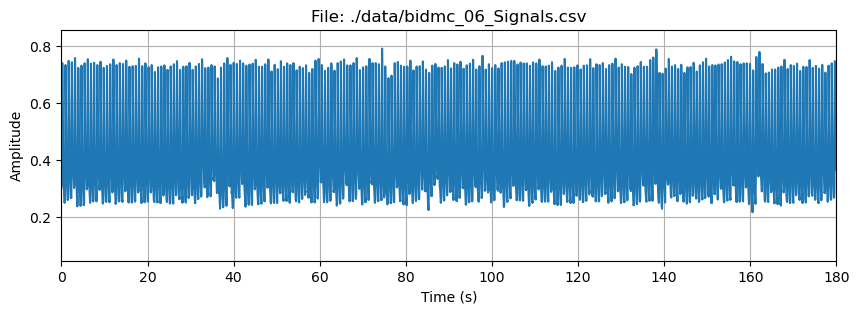

In [7]:
# Plot 180 seconds of the ppg signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

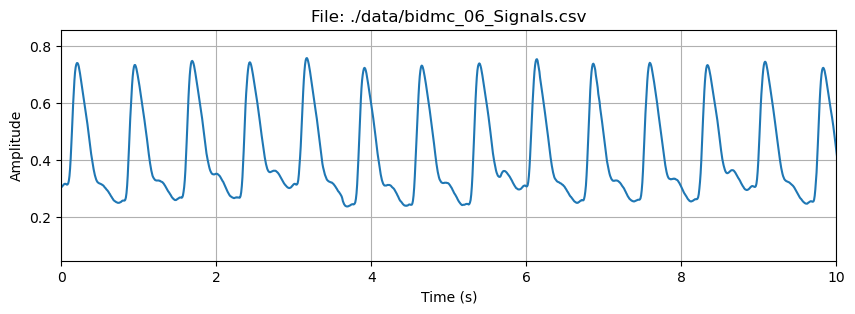

In [8]:
# Plot 10 seconds of the ppg signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 10) # Zoom in to the first 10 seconds
plt.grid()
plt.show()

In [9]:
# Find the peaks
peaks, properties = find_peaks(ppg, height = 0.6)

# Study and change the parameters for the peak detection
# - height: minimum height of peaks
# - distance: minimum distance between peaks
# - width: width of peaks
# - prominence: prominence of peaks
# - threshold: threshold for peaks


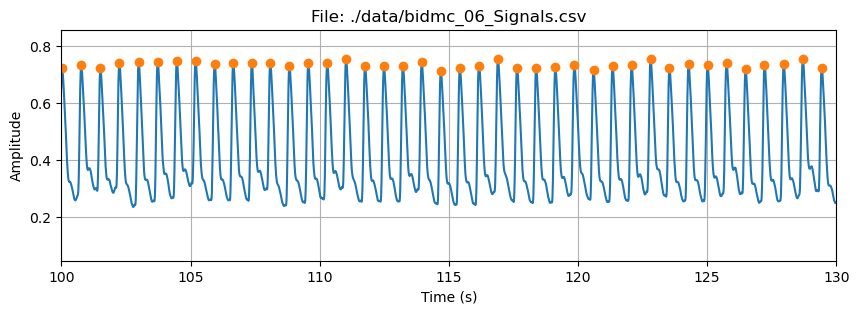

In [10]:
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130) 

plt.grid()
plt.show()

Notice, how the peak detection finds both positive and negative peaks. the aim is to find the positive peaks only.

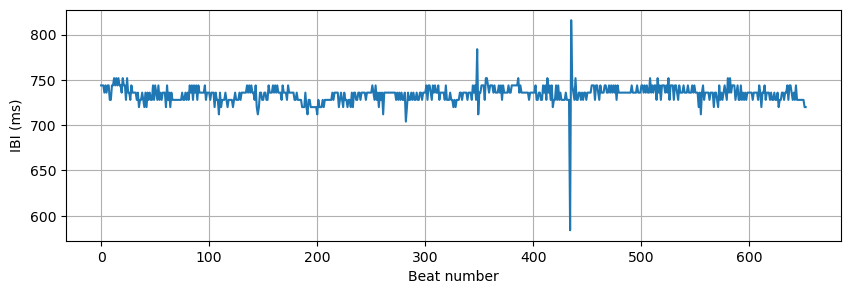

In [11]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Example: select the beats from 10 to 310. 
# Uncomment  and modify, if needed
# ppi = ppi[10:310]

# Example: select the beats with IBI between 600 and 800 ms
# Uncomment and modify, if needed
# i = (ppi > 600) & (ppi < 780)
# ppi = ppi[i]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()


Notice, how the inter-beat-intervals is not correct, as the peak detection is detecting also the negative peaks. You should try different parameters for the peak detection.

In [12]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')


Mean IBI: 734.27 ms
Heart rate: 81.71 bpm


## Useful numerical functions

In [13]:
# Some example data
x = np.array([1000, 1010, 1020, 1030, 1040, 1050])

# Some numpy functions
x_sqrt = np.sqrt(x) # Square root
x_2 = x**2 # Square
x_diff = np.diff(x) # Difference
x_mean = np.mean(x) # Mean
x_std = np.std(x) # Standard deviation

# Print the results
print(f'Original: {x}')
print('Square root:', [np.round(val,2) for val in x_sqrt])
print(f'Square: {x_2}')
print(f'Difference: {x_diff}')
print(f'Mean: {x_mean:.2f}')
print(f'Standard deviation: {x_std:.2f}')


Original: [1000 1010 1020 1030 1040 1050]
Square root: [31.62, 31.78, 31.94, 32.09, 32.25, 32.4]
Square: [1000000 1020100 1040400 1060900 1081600 1102500]
Difference: [10 10 10 10 10]
Mean: 1025.00
Standard deviation: 17.08


Notice, the code is incomplete and you need to complete the code to calculate the heart rate variability (HRV) and study the effect of the peak detection parameters on the HRV.

In addition, the values are not correct, as the detected peaks are not correct.

## Interpretations

You could add something like this at the end of your file.

- First, ...
- Second, ...
- And lastly, ....

## Headings

- one
- two
- three